In [244]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import csv
import numpy as np
from scipy.stats import linregress

#Study files

music_norm_path = "songs_normalize.csv"

music_norm = pd.read_csv(music_norm_path, encoding = "utf-8-sig")

music_norm.head(-1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.0,0.3550,0.894,95.053,pop
1,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.0,0.3470,0.544,119.992,"rock, metal"
2,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.0,0.0845,0.879,172.656,pop
3,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.0,0.0454,0.760,104.504,hip hop
4,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.0,0.4670,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,Post Malone,Goodbyes (Feat. Young Thug),174960,True,2019,1,0.580,0.653,5,-3.818,1,0.0745,0.4470,0.0,0.1110,0.175,150.231,hip hop
1932,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.0,0.1060,0.952,137.958,pop
1933,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.0,0.1050,0.564,169.994,pop
1934,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.0,0.2740,0.811,97.984,"hip hop, country"


## Cleaning the Dataset

In [245]:
# Drop unused columns
music_norm = music_norm.drop(columns=['explicit', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'])

In [246]:
music_norm

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,1,-5.444,0,0.894,95.053,pop
1,Bon Jovi,It's My Life,224493,2000,78,0,-4.063,0,0.544,119.992,"rock, metal"
2,*NSYNC,Bye Bye Bye,200560,2000,65,8,-4.806,0,0.879,172.656,pop
3,Eminem,The Real Slim Shady,284200,2000,86,5,-4.244,0,0.760,104.504,hip hop
4,Robbie Williams,Rock DJ,258560,2000,68,7,-4.264,1,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...
1932,Jonas Brothers,Sucker,181026,2019,79,1,-5.065,0,0.952,137.958,pop
1933,Taylor Swift,Cruel Summer,178426,2019,78,9,-5.707,1,0.564,169.994,pop
1934,Blanco Brown,The Git Up,200593,2019,69,9,-8.635,1,0.811,97.984,"hip hop, country"
1935,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,75,8,-7.513,1,0.347,102.998,pop


In [247]:
# Check for null values
missing_data_count = music_norm.isna().sum()
missing_data_count

#There is none (see below)

artist         0
song           0
duration_ms    0
year           0
popularity     0
key            0
loudness       0
mode           0
valence        0
tempo          0
genre          0
dtype: int64

In [248]:
# Check for duplicated rows
duplicated_rows = music_norm.duplicated()
music_norm[duplicated_rows].sort_values("song")

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
949,Lady Gaga,Bad Romance,294573,2009,80,0,-3.755,1,0.714,119.001,pop
1922,Post Malone,Better Now,231266,2018,80,10,-5.804,1,0.341,145.038,hip hop
1772,Jax Jones,Breathe,207629,2017,58,11,-5.520,0,0.686,125.985,"hip hop, pop, Dance/Electronic"
921,James Morrison,Broken Strings,250453,2008,70,1,-4.914,1,0.321,111.910,"pop, R&B"
1389,Ellie Goulding,Burn,231211,2014,70,1,-5.031,1,0.329,87.016,"pop, rock, Dance/Electronic"
1672,Rob $tone,Chill Bill (feat. J. Davi$ & Spooks),177184,2016,76,6,-10.028,1,0.230,108.034,hip hop
333,Coldplay,Clocks,307879,2002,79,5,-7.215,0,0.255,130.970,"rock, pop"
777,Soulja Boy,Crank That (Soulja Boy),221933,2007,74,0,-2.180,1,0.803,140.141,"hip hop, pop"
758,September,Cry for You,209800,2007,65,9,-3.988,1,0.961,130.018,"pop, Dance/Electronic"
647,The All-American Rejects,Dirty Little Secret,193653,2005,65,10,-4.253,1,0.462,143.853,"rock, pop"


In [249]:
# drop duplicated values
music_norm = music_norm.drop_duplicates()
music_norm

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,1,-5.444,0,0.894,95.053,pop
1,Bon Jovi,It's My Life,224493,2000,78,0,-4.063,0,0.544,119.992,"rock, metal"
2,*NSYNC,Bye Bye Bye,200560,2000,65,8,-4.806,0,0.879,172.656,pop
3,Eminem,The Real Slim Shady,284200,2000,86,5,-4.244,0,0.760,104.504,hip hop
4,Robbie Williams,Rock DJ,258560,2000,68,7,-4.264,1,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...
1932,Jonas Brothers,Sucker,181026,2019,79,1,-5.065,0,0.952,137.958,pop
1933,Taylor Swift,Cruel Summer,178426,2019,78,9,-5.707,1,0.564,169.994,pop
1934,Blanco Brown,The Git Up,200593,2019,69,9,-8.635,1,0.811,97.984,"hip hop, country"
1935,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,75,8,-7.513,1,0.347,102.998,pop


### Find all unique genres

In [250]:
unique_genre = len(music_norm["genre"].unique())
unique_genre

57

In [251]:
unique_artists = music_norm["artist"].unique()
unique_artists 

array(['Britney Spears', 'Bon Jovi', '*NSYNC', 'Eminem',
       'Robbie Williams', 'Modjo', "Gigi D'Agostino", "Bomfunk MC's",
       'Aaliyah', 'Alice Deejay', 'Linkin Park', 'Sonique', 'M.O.P.',
       'Limp Bizkit', 'Darude', 'Da Brat', 'Moloko', 'Chicane',
       'Debelah Morgan', 'Madonna', 'Ruff Endz', 'Kylie Minogue',
       'LeAnn Rimes', 'Avant', 'Toni Braxton', 'Bow Wow',
       'Samantha Mumba', 'Mýa', 'Mary Mary', 'Next', 'Janet Jackson',
       'Ricky Martin', 'Jagged Edge', 'JAY-Z', 'Baha Men', 'Oasis',
       'DJ Ötzi', 'P!nk', 'Mariah Carey', 'Craig David', 'Sammie',
       'Kandi', 'Vengaboys', 'Ronan Keating', '3 Doors Down',
       'Carl Thomas', 'Mystikal', 'Fuel', 'Westlife', 'All Saints',
       "Destiny's Child", 'Erykah Badu', 'Matchbox Twenty', 'Gabrielle',
       'Backstreet Boys', 'The Corrs', 'Joe', 'Nelly', 'Shaggy',
       'Christina Aguilera', 'Nelly Furtado', 'Shakira',
       'Jimmy Eat World', 'Train', 'Geri Halliwell', 'Blu Cantrell',
       'Missy El

In [252]:
# unique_song = music_norm["song"].unique().sort_values()
# unique_song
unique_song = music_norm["song"].unique()
print(sorted(unique_song))

['#SELFIE - Original Mix', '#thatPOWER', "'Till I Collapse", '(When You Gonna) Give It Up to Me (feat. Keyshia Cole) - Radio Version', '...Ready For It?', "03' Bonnie & Clyde", '1 Thing', '1, 2 Step (feat. Missy Elliott) - Main', '1, 2, 3 (feat. Jason Derulo & De La Ghetto)', '17', '1955', '1973', '2 On (feat. ScHoolboy Q)', '2 Phones', '2002', '21 Guns', '21 Questions', '21 Seconds', '212', '22', '24K Magic', '2U (feat. Justin Bieber)', '3 Nights', '3005', '4 Minutes (feat. Justin Timberlake & Timbaland)', '4 My People (feat. Eve)', '6 Foot 7 Foot', '679 (feat. Remy Boyz)', '7 Days', '7 rings', '711', 'A Little Less Conversation - JXL Radio Edit Remix', 'A Milli', 'A Moment Like This', 'A New Day Has Come - Radio Remix', 'A Sky Full of Stars', 'A Thousand Miles', 'A Thousand Years', "A Woman's Worth", 'AM To PM', 'About You Now', "Acceptable in the 80's", 'Adan y Eva', 'Addicted', 'Addictive', 'Adventure of a Lifetime', 'Again', 'Against All Odds (Take A Look at Me Now) (feat. Westlif

In [253]:
def filter_genre(genre): 
    # genre='rock'
    filter_df=music_norm['genre'].str.contains(genre)
    small_df=music_norm.loc[filter_df, :]
    small_df.head()
    return len(small_df)

In [254]:
genre_list=music_norm['genre'].str.split(', ').explode().unique()
genre_list

array(['pop', 'rock', 'metal', 'hip hop', 'Dance/Electronic', 'R&B',
       'country', 'latin', 'Folk/Acoustic', 'easy listening',
       'World/Traditional', 'blues', 'jazz', 'classical'], dtype=object)

In [255]:
for each_genre in genre_list: 
    count=filter_genre(each_genre)
    print(f'{each_genre} contains {count} records')

pop contains 1550 records
rock contains 217 records
metal contains 61 records
hip hop contains 741 records
Dance/Electronic contains 377 records
R&B contains 428 records
country contains 19 records
latin contains 60 records
Folk/Acoustic contains 19 records
easy listening contains 6 records
World/Traditional contains 9 records
blues contains 3 records
jazz contains 2 records
classical contains 1 records


In [256]:
# Split the values in the column
genres = music_norm["genre"].str.split(',', expand=True)
# Convert the list of values into separate rows
# genres = genres.explode("genre")
# Find the unique values
# genres.unique()

In [257]:
genres #test

,0,1,2,3
0,pop,None,None,None
1,rock,metal,None,None
2,pop,None,None,None
3,hip hop,None,None,None
4,pop,rock,None,None
...,...,...,...,...
1932,pop,None,None,None
1933,pop,None,None,None
1934,hip hop,country,None,None
1935,pop,None,None,None


### Analyzing Popularity

#### Popular genre & how they have changed from 2000 to 2019 - Grace

In [258]:
# Grab genre and year and create a new dataframe.
genre_pop_year = music_norm.loc[:,["year","genre","popularity"]]
genre_pop_year

,year,genre,popularity
0,2000,pop,77
1,2000,"rock, metal",78
2,2000,pop,65
3,2000,hip hop,86
4,2000,"pop, rock",68
...,...,...,...
1932,2019,pop,79
1933,2019,pop,78
1934,2019,"hip hop, country",69
1935,2019,pop,75


In [259]:
genre_list


array(['pop', 'rock', 'metal', 'hip hop', 'Dance/Electronic', 'R&B',
       'country', 'latin', 'Folk/Acoustic', 'easy listening',
       'World/Traditional', 'blues', 'jazz', 'classical'], dtype=object)


Hypothesis: Pop is a consistently popular genre through the years of 2000 to 2020. 
Null Hypothesis: Average popularity of the genre Pop will be consistently over 50% in the years of 2000 to 2020. 
Alternative Hypothesis: Average popularity of the genre Pop will not be consistently over 50% in the years of 2000 to 2020. 
Observation: Pop remains within the 55 to 65% average popularity throughout 2000 to 2020.The 1998 and 2020 data might have to be discounted, as this dataset was meant for 2019 to 2020. 
Conclusion: In the years 2000 to 2019, the genre pop remains above 50% popularity. In 2020, average popularity seems to have tapered off to below 40%, but this may be due to the incompleteness of the dataset around the first and last years.
    


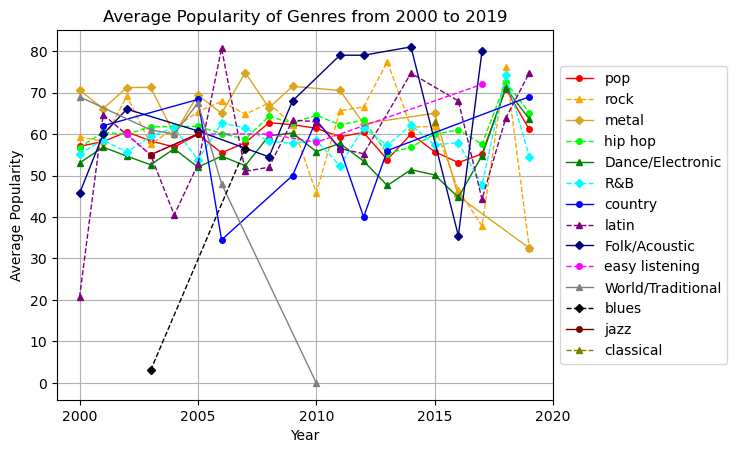

In [260]:
# Create color list, line style list, and counter for the for loop
colors = ["red", "orange", "goldenrod", "lime", "green", "cyan", "blue", "purple", "navy", "magenta", "grey", "black", "maroon", "olive"]
line_styles = ["-","--"] # for accessibility
markers = ["o","^", "D"] # for accessibility
counter = 0

# For each genre, create a small data frame with only songs from that genre, get the average popularity per year, and plot. 
for genre in genre_list:
    filter_df=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[filter_df, :]
    # Get average popularity of this genre per year
    yearly_popularity = small_df.groupby("year").mean()
    yearly_popularity
    # Plot average popularity vs. year. 
    plt.plot(yearly_popularity.index, 
             yearly_popularity["popularity"], 
             label=genre,
             marker=markers[counter % 3], # Use modulo % to repeatedly iterate. 
             markersize=4, # Set size of markers
             color=colors[counter], #Set line colors to colors in list. 
             linestyle=line_styles[counter % 2], # vary line style
             linewidth=1
            )
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.title("Average Popularity of Genres from 2000 to 2019")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.xticks(np.arange(2000, 2021, 5)) #set x ticks at year 2000 to 2020, with 5 year intervals in between. 

print("""
Hypothesis: Pop is a consistently popular genre through the years of 2000 to 2020. 
Null Hypothesis: Average popularity of the genre Pop will be consistently over 50% in the years of 2000 to 2020. 
Alternative Hypothesis: Average popularity of the genre Pop will not be consistently over 50% in the years of 2000 to 2020. 
Observation: Pop remains within the 55 to 65% average popularity throughout 2000 to 2020.The 1998 and 2020 data might have to be discounted, as this dataset was meant for 2019 to 2020. 
Conclusion: In the years 2000 to 2019, the genre pop remains above 50% popularity. In 2020, average popularity seems to have tapered off to below 40%, but this may be due to the incompleteness of the dataset around the first and last years.
    """)

#Save file
plt.savefig("Assets/Grace_GenrevYear_Overall.png", dpi=300)


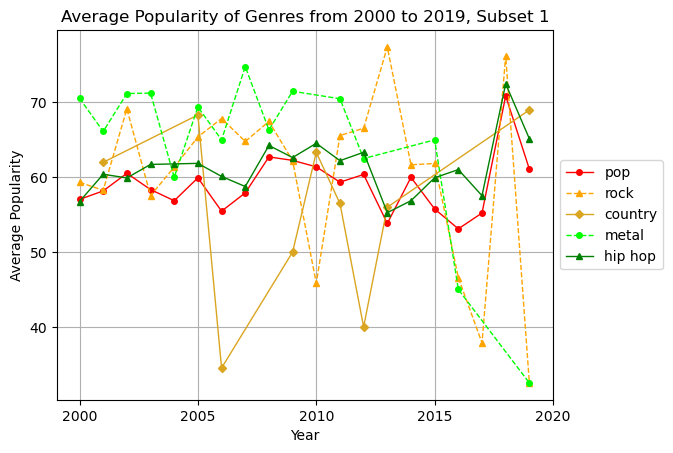

In [261]:
# Place five genres in container
genre_container_1 = ['pop', 'rock', 'country', 'metal', 'hip hop']

# Reset counter
counter = 0

# For each genre, create a small data frame with only songs from that genre, get the average popularity per year, and plot. 
for genre in genre_container_1:
    filter_df=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[filter_df, :]
    # Get average popularity of this genre per year
    yearly_popularity = small_df.groupby("year").mean()
    yearly_popularity
    # Plot average popularity vs. year. 
    plt.plot(yearly_popularity.index, 
             yearly_popularity["popularity"], 
             label=genre,
             marker=markers[counter % 3], # Use modulo % to repeatedly iterate. 
             markersize=4,
             color=colors[counter], 
             linestyle=line_styles[counter % 2],
             linewidth=1
            )
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #place legend outside of graph. 
plt.title("Average Popularity of Genres from 2000 to 2019, Subset 1")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.xticks(np.arange(2000, 2021, 5)) #set x ticks at year 2000 to 2020, with 5 year intervals in between. 

# Save file
plt.savefig("Assets/Grace_GenrevYear_1.png", dpi=300)

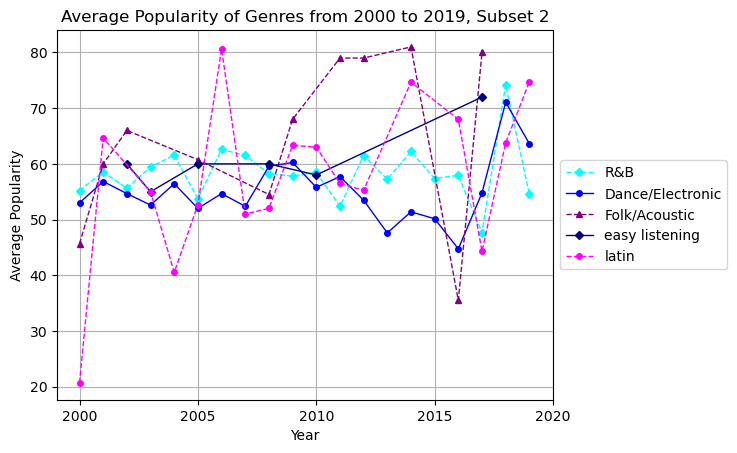

In [262]:
# Place five genres in container
genre_container_2 = ["R&B", 'Dance/Electronic', 'Folk/Acoustic', 'easy listening', 'latin']

# For each genre, create a small data frame with only songs from that genre, get the average popularity per year, and plot. 
for genre in genre_container_2:
    filter_df=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[filter_df, :]
    # Get average popularity of this genre per year
    yearly_popularity = small_df.groupby("year").mean()
    yearly_popularity
    # Plot average popularity vs. year. 
    plt.plot(yearly_popularity.index, 
             yearly_popularity["popularity"], 
             label=genre,
             marker=markers[counter % 3], # Use modulo % to repeatedly iterate. 
             markersize=4,
             color=colors[counter], 
             linestyle=line_styles[counter % 2],
             linewidth=1
            )
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.title("Average Popularity of Genres from 2000 to 2019, Subset 2")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.xticks(np.arange(2000, 2021, 5))

plt.savefig("Assets/Grace_GenrevYear_2.png", dpi=300)

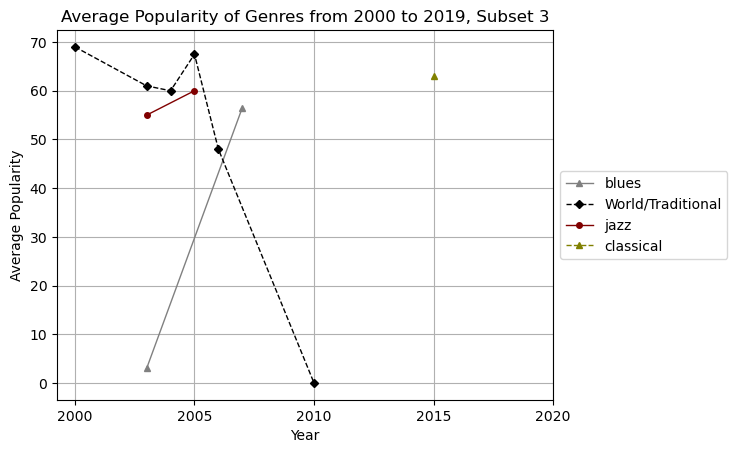

In [263]:
genre_container_3 = ['blues', 'World/Traditional', 'jazz', 'classical']

# For each genre, create a small data frame with only songs from that genre, get the average popularity per year, and plot. 
for genre in genre_container_3:
    filter_df=genre_pop_year['genre'].str.contains(genre)
    small_df=genre_pop_year.loc[filter_df, :]
    # Get average popularity of this genre per year
    yearly_popularity = small_df.groupby("year").mean()
    yearly_popularity
    # Plot average popularity vs. year. 
    plt.plot(yearly_popularity.index, 
             yearly_popularity["popularity"], 
             label=genre,
             marker=markers[counter % 3], # Use modulo % to repeatedly iterate. 
             markersize=4,
             color=colors[counter], 
             linestyle=line_styles[counter % 2],
             linewidth=1
            )
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.title("Average Popularity of Genres from 2000 to 2019, Subset 3")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.xticks(np.arange(2000, 2021, 5))

#Save file
plt.savefig("Assets/Grace_GenrevYear_3.png", dpi=300)



#### Length of Song vs Popularity - Daniel

#### Loudness vs popularity - Bree

### Analyzing By the Year

#### Loudness vs year- Daniel

####	Duration vs Year- Bree



####	Avg bpm vs year - Grace


In [264]:
# Look at min/max of bpm to determine bin ranges. 
music_norm.describe()

,duration_ms,year,popularity,key,loudness,mode,valence,tempo
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,228295.421725,2009.720447,59.589457,5.396699,-5.498472,0.553781,0.551325,120.101666
std,39045.257902,5.734038,21.754998,3.602481,1.934716,0.497232,0.220232,26.984075
min,113000.000000,2000.000000,0.000000,0.000000,-20.514000,0.000000,0.038100,60.019000
25%,203422.750000,2005.000000,56.000000,2.000000,-6.476000,0.000000,0.388250,98.564750
50%,223026.500000,2010.000000,65.500000,6.000000,-5.270000,1.000000,0.557000,120.020500
75%,247239.500000,2015.000000,73.000000,8.000000,-4.166250,1.000000,0.729750,134.147250
max,484146.000000,2019.000000,89.000000,11.000000,-0.276000,1.000000,0.973000,210.851000


In [265]:
# Grab only the values needed and place in new dataframe. 
year_bpm = music_norm.loc[:,["year","tempo"]]

# Create a bin for bpms
bins = [60,90,120,150,180,210,240]
bpm_ranges = ["60 to 90 BPM","90 to 120 BPM","120 to 150 BPM","150 to 180 BPM","180 to 210 BPM","210 to 240 BPM"]

# Use pd.cut to place songs in bpm bins, and place df. 
year_bpm["BPM Ranges"] = pd.cut(year_bpm["tempo"], bins, labels=bpm_ranges,include_lowest=True)


Observation: Generally speaking, songs within the 90 to 150 BPM range are more popular
             than songs below 90 BPM and above 160 BPM. It is notable that around 2013
             to 2014, songs in the range of 120 to 180 BPM shot up in popularity.


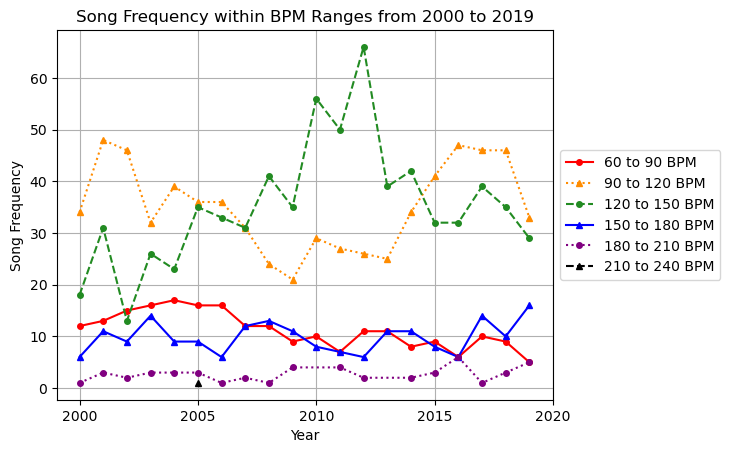

In [266]:
# Create color list, line style list, and counter for the for loop
colors = ["red","darkorange","forestgreen", "blue", "purple", "black"]
line_styles = ["-",":","--"] # for accessibility
markers = ["o","^"] # for accessibility
counter = 0

# For every bpm range, create a line chart plotting year as the x-axis and the number of counts as the y axis. 
for bpm_range in bpm_ranges:
    # Grab the range in a new dataframe
    df = year_bpm[year_bpm["BPM Ranges"] == bpm_range]
    # Get number of counts per year. 
    yearly_counts = df.groupby("year").size() 
    # Plot 
    yearly_counts.plot(kind="line", 
                       marker=markers[counter % 2], # Use modulo % to repeatedly iterate. 
                       markersize=4,
                       color=colors[counter], 
                       linestyle=line_styles[counter % 3], 
                       label= bpm_range)
    # Progress counter
    counter = counter + 1
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.ylabel("Song Frequency")
plt.title("Song Frequency within BPM Ranges from 2000 to 2019")
plt.xlabel("Year")

plt.xticks(np.arange(2000, 2021, 5))


print("""
Observation: Generally speaking, songs within the 90 to 150 BPM range are more popular
             than songs below 90 BPM and above 160 BPM. It is notable that around 2013
             to 2014, songs in the range of 120 to 180 BPM shot up in popularity.""")


#Save file
plt.savefig("Assets/Grace_BPMvYear.png", dpi=300)


####	Valence vs Year- Pooja

### Analyzing Key/mode 



#### Key/mode vs. popularity - Pooja


#### Key/mode vs artist - Kiana 


#### Key/mode vs year - Kiana